In [153]:
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib 
matplotlib.rcParams.update({'font.size': 16})

In [154]:
# Baca data dari file CSV
file_path1 = 'output.csv'  # Ganti dengan path ke file CSV Anda
data = pd.read_csv(file_path1)

In [155]:
data6 = data

# Visualisasi Perjalanan Robot

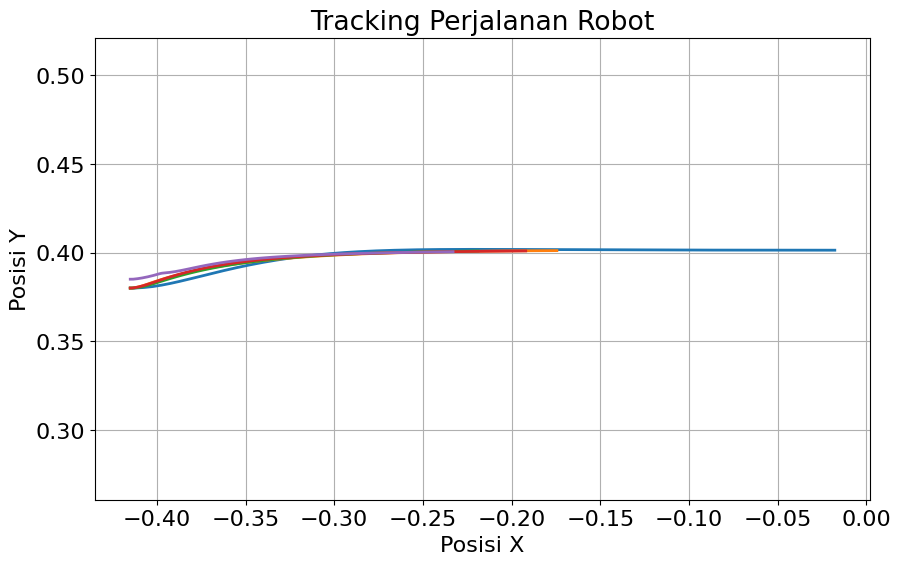

In [147]:
# Plot posisi X dan Y
plt.figure(figsize=(10, 6))
plt.plot(data1['X'], data1['Y'], linewidth=2)
plt.plot(data2['X'], data2['Y'], linewidth=2)
plt.plot(data3['X'], data3['Y'], linewidth=2)
plt.plot(data4['X'], data4['Y'], linewidth=2)
plt.plot(data5['X'], data5['Y'], linewidth=2)

plt.title('Tracking Perjalanan Robot')
plt.xlabel('Posisi X')
plt.ylabel('Posisi Y')
#plt.legend(['Fixed Base Speed', 'Dynamic Base Speed']) 
plt.grid(True)
plt.axis('equal')  # Membuat skala pada sumbu X dan Y sama besarnya
plt.show()

# Analisis Kinerja PID Controller

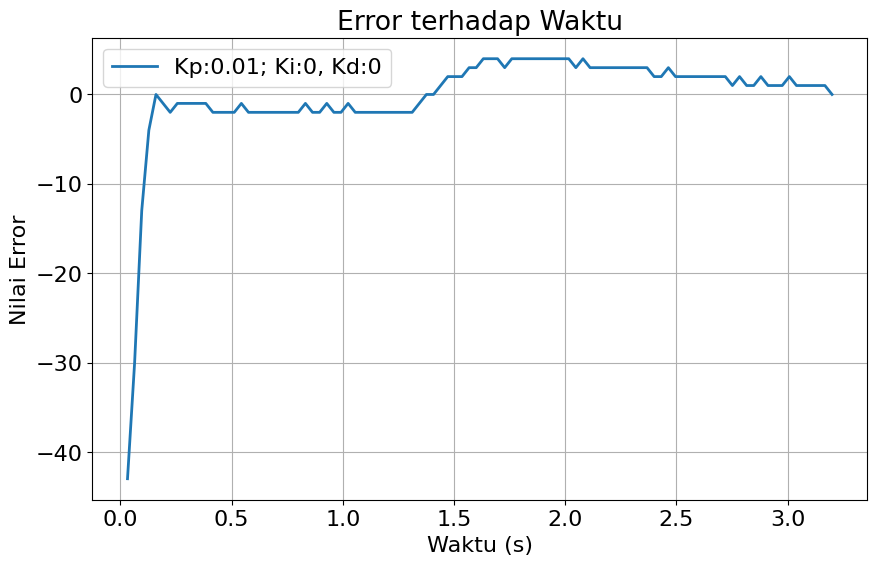

In [156]:
# Plot Error dan DeltaError terhadap waktu
plt.figure(figsize=(10, 6))

X1 = np.array(data6['Time'])
Y1 = np.array(data6['Error'])

plt.plot(X1, Y1, label='Kp:0.01; Ki:0, Kd:0', linewidth=2)

#plt.title('Error, IntegralError dan DeltaError terhadap Waktu')
plt.title('Error terhadap Waktu')
plt.xlabel('Waktu (s)')
plt.ylabel('Nilai Error')
plt.legend()
plt.grid(True)
plt.show()

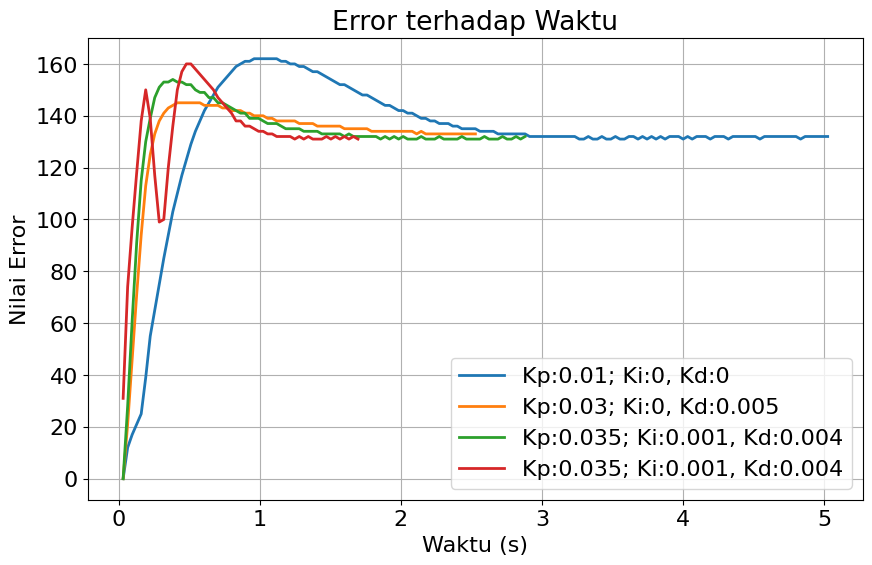

In [148]:
# Plot Error dan DeltaError terhadap waktu
plt.figure(figsize=(10, 6))

X1 = np.array(data1['Time'])
Y1 = np.array(data1['Error'])
Y1 = Y1 - (-132)

X2 = np.array(data3['Time'])
Y2 = np.array(data3['Error'])
Y2 = Y2 - (-132)

X3 = np.array(data4['Time'])
Y3 = np.array(data4['Error'])
Y3 = Y3 - (-132)

X4 = np.array(data5['Time'])
Y4 = np.array(data5['Error'])
Y4 = Y4 - (-132)

plt.plot(X1, Y1, label='Kp:0.01; Ki:0, Kd:0', linewidth=2)
plt.plot(X2, Y2, label='Kp:0.03; Ki:0, Kd:0.005', linewidth=2)
plt.plot(X3, Y3, label='Kp:0.035; Ki:0.001, Kd:0.004', linewidth=2)
plt.plot(X4, Y4, label='Kp:0.035; Ki:0.001, Kd:0.004', linewidth=2)

#plt.title('Error, IntegralError dan DeltaError terhadap Waktu')
plt.title('Error terhadap Waktu')
plt.xlabel('Waktu (s)')
plt.ylabel('Nilai Error')
plt.legend()
plt.grid(True)
plt.show()

-132


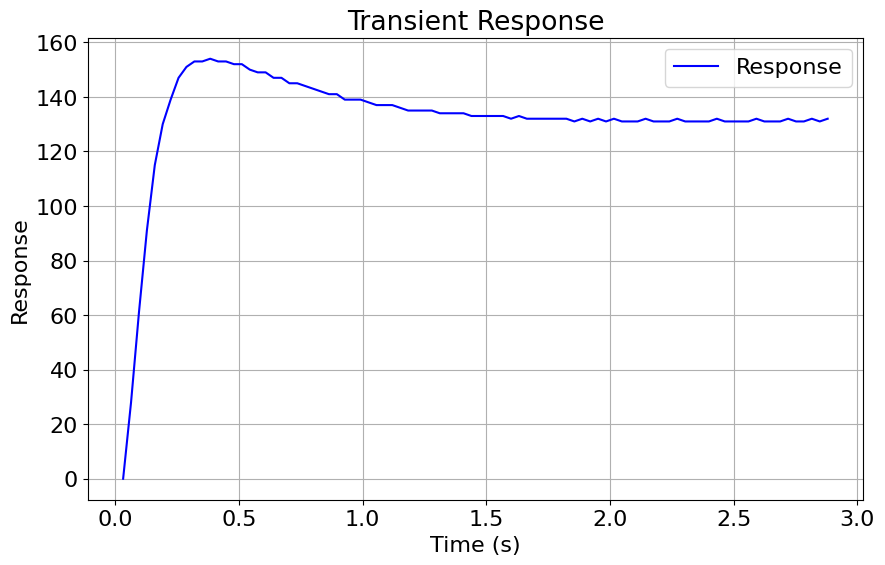

Rise Time: 0.128 s
Peak Time: 0.384 s
Overshoot: 16.666666666666664 %
Settling Time: 1.28 s


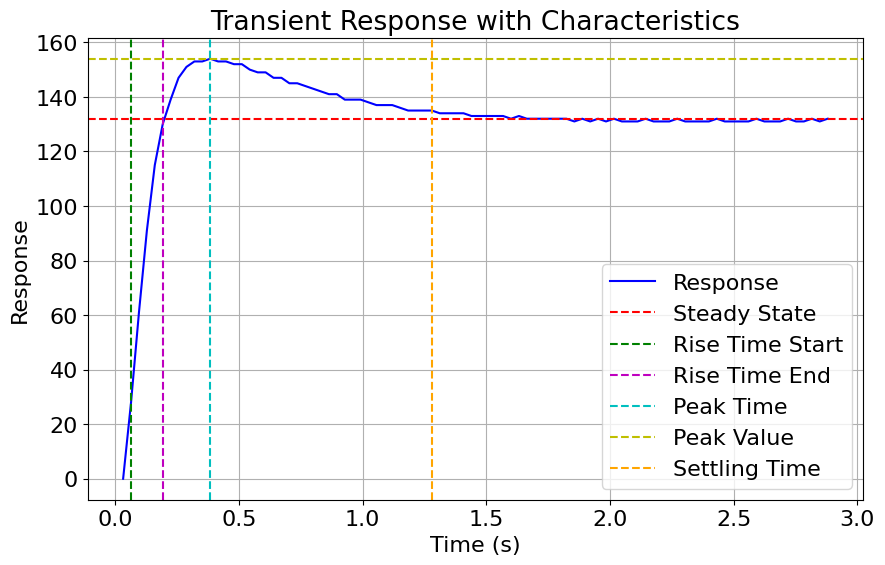

In [138]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Contoh data X dan Y
X = np.array(data4['Time'])
Y = np.array(data4['Error'])
min_Y = np.min(Y)
Y = Y - min_Y


# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(X, Y, label='Response', color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.title('Transient Response')
plt.grid(True)
plt.legend()
plt.show()

# Calculating characteristics
def calculate_response_characteristics(X, Y):
    # Steady state value
    steady_state = Y[-1]
    
    # Rise time (time to go from 10% to 90% of steady-state value)
    rise_time_start = next(x for x, val in zip(X, Y) if val >= 0.1 * steady_state)
    rise_time_end = next(x for x, val in zip(X, Y) if val >= 0.9 * steady_state)
    rise_time = rise_time_end - rise_time_start
    
    # Peak time (time to reach the maximum value)
    peak_index = np.argmax(Y)
    peak_time = X[peak_index]
    
    # Overshoot (% above the steady-state value)
    peak_value = Y[peak_index]
    overshoot = ((peak_value - steady_state) / steady_state) * 100
    
    # Settling time (time to stay within 2% of the steady-state value)
    settling_time = next((x for x, val in reversed(list(zip(X, Y))) if abs(val - steady_state) > 0.02 * steady_state), X[-1])
    
    return rise_time, peak_time, overshoot, settling_time, steady_state, rise_time_start, rise_time_end, peak_value

rise_time, peak_time, overshoot, settling_time, steady_state, rise_time_start, rise_time_end, peak_value = calculate_response_characteristics(X, Y)

print(f"Rise Time: {rise_time} s")
print(f"Peak Time: {peak_time} s")
print(f"Overshoot: {overshoot} %")
print(f"Settling Time: {settling_time} s")

# Plotting with annotations
plt.figure(figsize=(10, 6))
plt.plot(X, Y, label='Response', color='blue')
plt.axhline(y=steady_state, color='r', linestyle='--', label='Steady State')
plt.axvline(x=rise_time_start, color='g', linestyle='--', label='Rise Time Start')
plt.axvline(x=rise_time_end, color='m', linestyle='--', label='Rise Time End')
plt.axvline(x=peak_time, color='c', linestyle='--', label='Peak Time')
plt.axhline(y=peak_value, color='y', linestyle='--', label='Peak Value')
plt.axvline(x=settling_time, color='orange', linestyle='--', label='Settling Time')

plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.title('Transient Response with Characteristics')
plt.grid(True)
plt.legend()
plt.show()

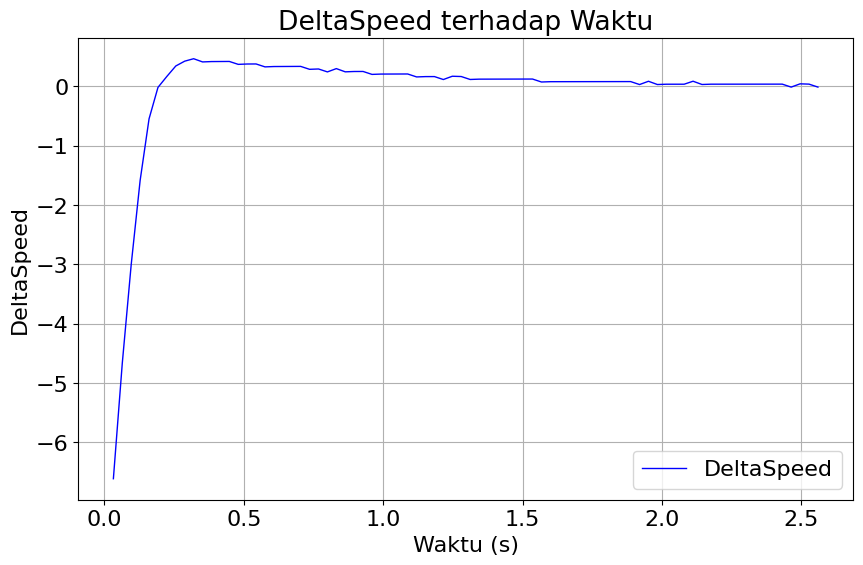

In [75]:
# Plot DeltaSpeed terhadap waktu
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['DeltaSpeed'], label='DeltaSpeed', color='b', linewidth=1)
plt.title('DeltaSpeed terhadap Waktu')
plt.xlabel('Waktu (s)')
plt.ylabel('DeltaSpeed')
plt.legend()
plt.grid(True)
plt.show()

## Mean Absolute Error (MAE)

In [132]:
mae = data['Error'].abs().mean()
print(f'Mean Absolute Error (MAE): {mae}')

Mean Absolute Error (MAE): 3.7305785123966944


## Mean Squared Error (MSE)

In [133]:
mse = (data['Error'] ** 2).mean()
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 44.3267217630854


## Root Mean Squared Error (RMSE)

In [134]:
rmse = mse ** 0.5
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 6.657831611199355


## Mean Absolute Percentage Error (MAPE)

In [135]:
mape = (data['Error'].abs() / data['SetPointError']).mean() * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

Mean Absolute Percentage Error (MAPE): 2.33%


In [136]:
# Hitung metrik error
mae = data['Error'].abs().mean()
mse = (data['Error'] ** 2).mean()
rmse = mse ** 0.5
mape = (data['Error'].abs() / data['SetPointError']).mean() * 100

# Cetak hasil
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

Mean Absolute Error (MAE): 3.7305785123966944
Mean Squared Error (MSE): 44.3267217630854
Root Mean Squared Error (RMSE): 6.657831611199355
Mean Absolute Percentage Error (MAPE): 2.33%


# Analisis respon transien

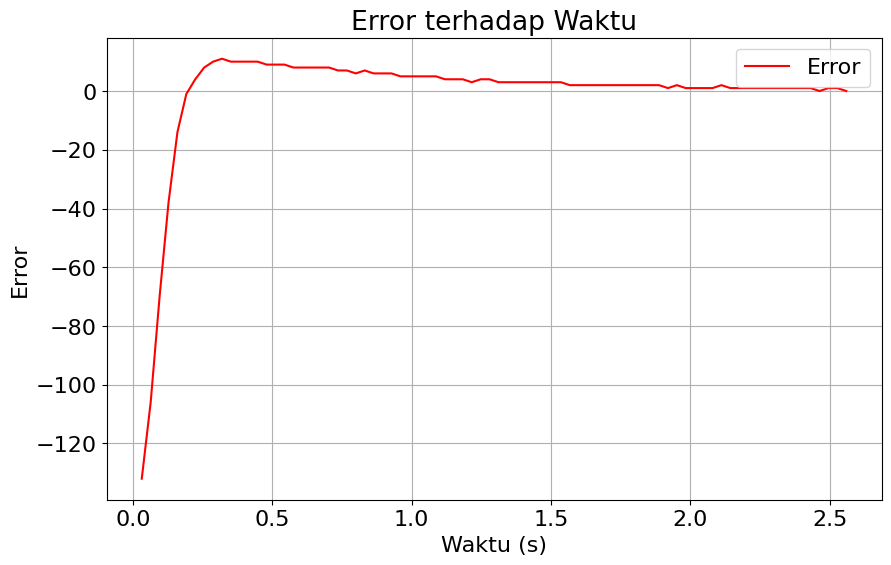

Rise Time: 0.032 s
Peak Time: 0.32 s
Overshoot: -93.12 %
Settling Time: 0.192 s


In [76]:
# Plot respons Error terhadap waktu
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['Error'], label='Error', color='r')
plt.title('Error terhadap Waktu')
plt.xlabel('Waktu (s)')
plt.ylabel('Error')
plt.grid(True)
plt.legend()
plt.show()

# Analisis respons transien
def analyze_transient_response(time, error, set_point):
    error_abs = error.abs()
    
    rise_time_idx = (error_abs > 0.1 * set_point).idxmax()
    rise_time = time[rise_time_idx]

    peak_error = error.max()
    peak_time_idx = error.idxmax()
    peak_time = time[peak_time_idx]

    overshoot = ((peak_error - set_point) / set_point) * 100

    settling_time_idx = (error_abs <= 0.02 * set_point).idxmax()
    settling_time = time[settling_time_idx]

    return rise_time, peak_time, overshoot, settling_time

set_point = data['SetPointError'].iloc[0]  # Misalkan set point konstan
time = data['Time']
error = data['Error']

rise_time, peak_time, overshoot, settling_time = analyze_transient_response(time, error, set_point)

print(f'Rise Time: {rise_time} s')
print(f'Peak Time: {peak_time} s')
print(f'Overshoot: {overshoot:.2f} %')
print(f'Settling Time: {settling_time} s')

# Analisis Kecepatan Roda

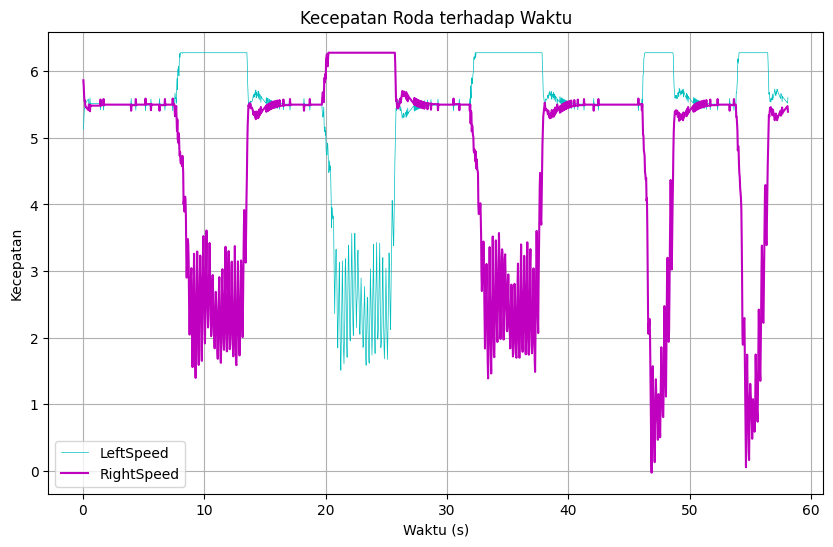

In [138]:
# Plot kecepatan roda kiri dan kanan terhadap waktu
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['LeftSpeed'], label='LeftSpeed', color='c', linewidth=0.5)
plt.plot(data['Time'], data['RightSpeed'], label='RightSpeed', color='m')
plt.title('Kecepatan Roda terhadap Waktu')
plt.xlabel('Waktu (s)')
plt.ylabel('Kecepatan')
plt.legend()
plt.grid(True)
plt.show()

# Analisis Orientasi Robot

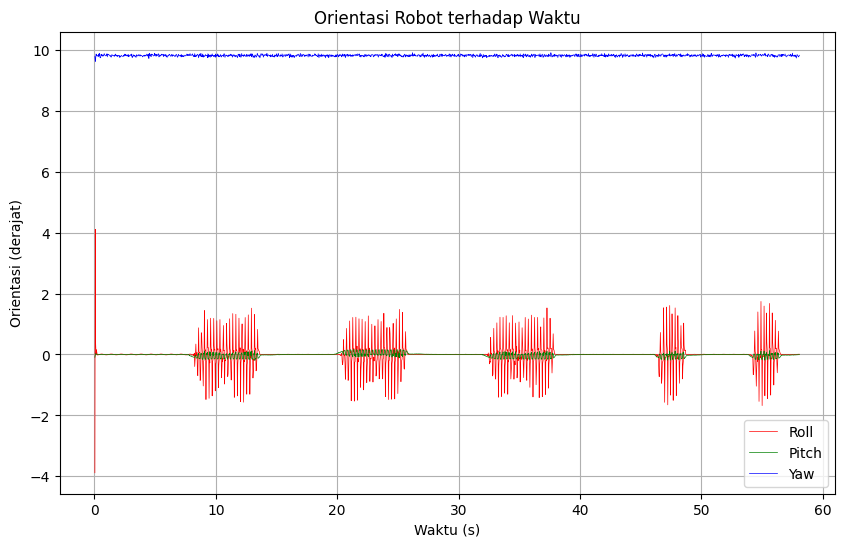

In [139]:
# Plot Roll, Pitch, dan Yaw terhadap waktu
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['Roll'], label='Roll', color='r', linewidth=0.5)
plt.plot(data['Time'], data['Pitch'], label='Pitch', color='g', linewidth=0.5)
plt.plot(data['Time'], data['Yaw'], label='Yaw', color='b', linewidth=0.5)
plt.title('Orientasi Robot terhadap Waktu')
plt.xlabel('Waktu (s)')
plt.ylabel('Orientasi (derajat)')
plt.legend()
plt.grid(True)
plt.show()

# Analisis Korelasi

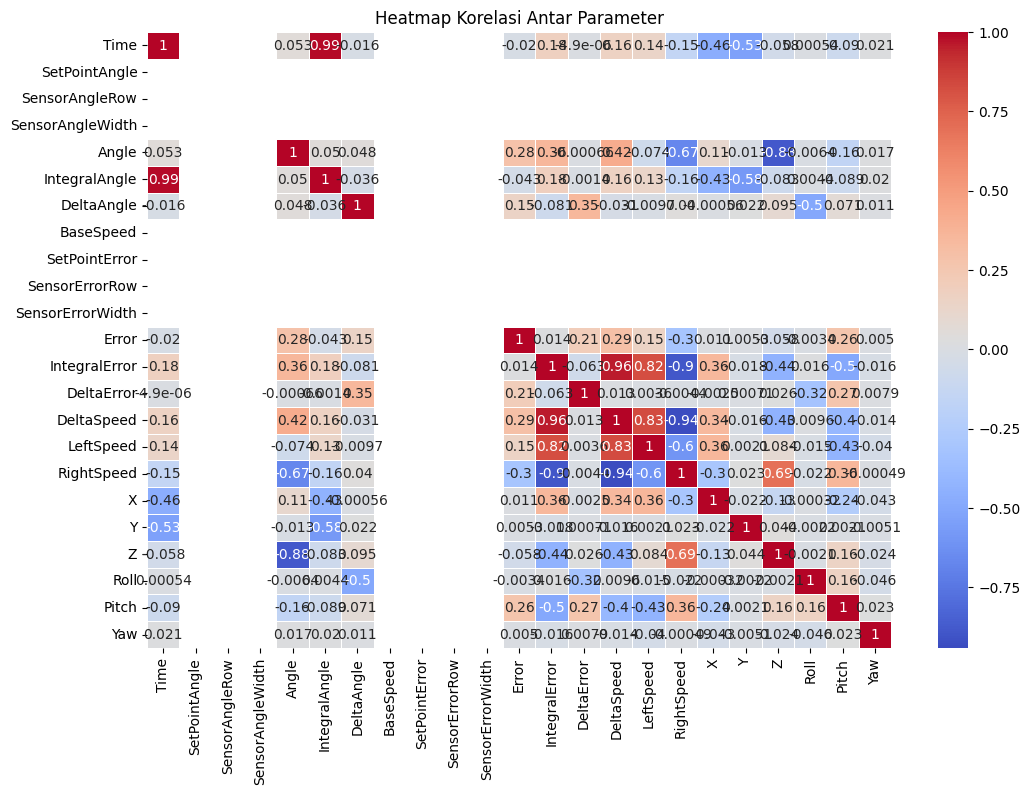

In [140]:
import seaborn as sns

# Hitung matriks korelasi
correlation_matrix = data.corr()

# Plot heatmap dari matriks korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Parameter')
plt.show()

# Analisis Stabilitas

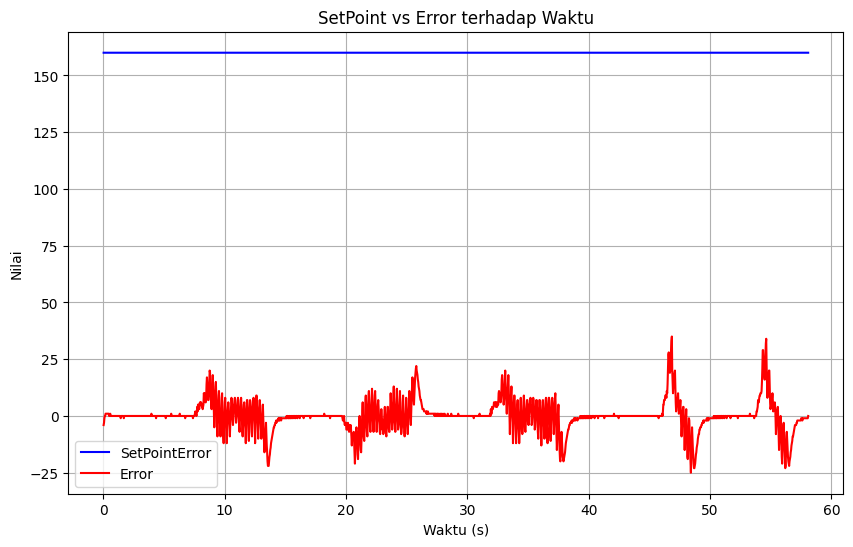

In [141]:
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['SetPointError'], label='SetPointError', color='b')
plt.plot(data['Time'], data['Error'], label='Error', color='r')
plt.title('SetPoint vs Error terhadap Waktu')
plt.xlabel('Waktu (s)')
plt.ylabel('Nilai')
plt.legend()
plt.grid(True)
plt.show()

# Analisis Kinerja Dinamis

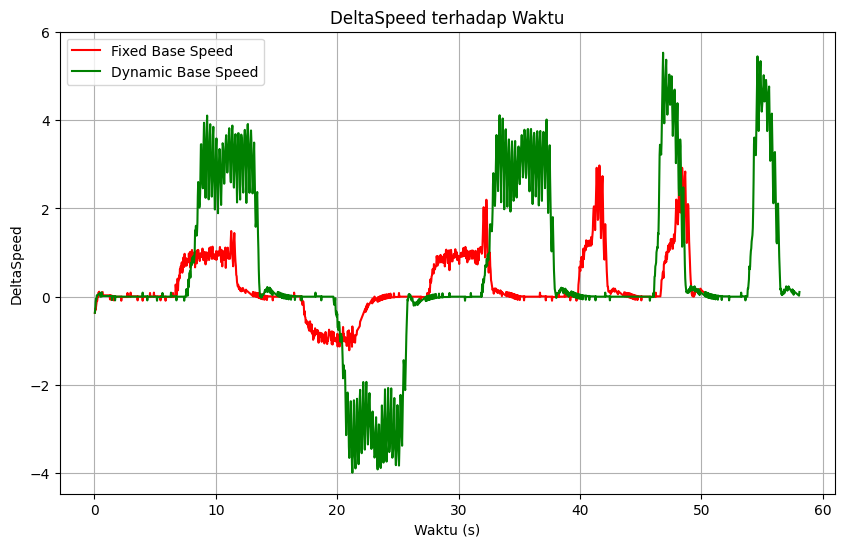

In [174]:
# Plot DeltaSpeed terhadap waktu
plt.figure(figsize=(10, 6))
plt.plot(data1['Time'], data1['DeltaSpeed'], label='Fixed Base Speed', color='r')
plt.plot(data2['Time'], data2['DeltaSpeed'], label='Dynamic Base Speed', color='g')
plt.title('DeltaSpeed terhadap Waktu')
plt.xlabel('Waktu (s)')
plt.ylabel('DeltaSpeed')
plt.legend(['Fixed Base Speed', 'Dynamic Base Speed']) 
plt.grid(True)
plt.show()

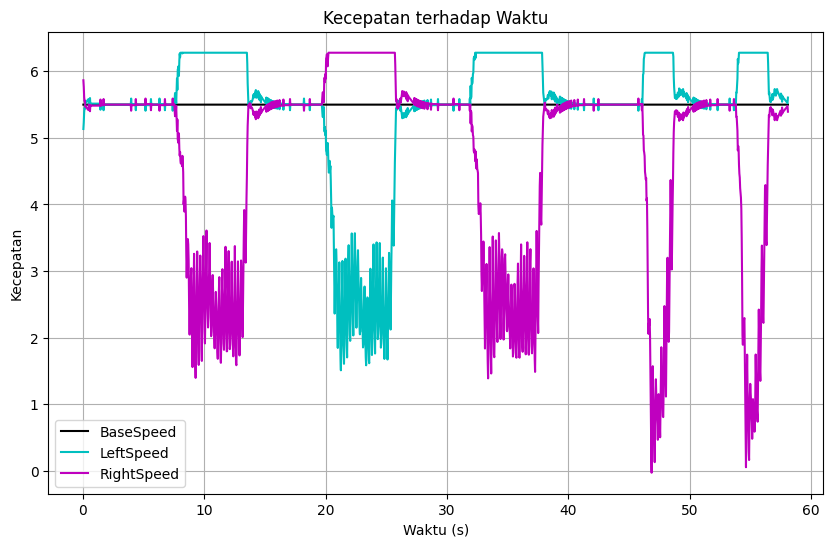

In [143]:
# Plot BaseSpeed, LeftSpeed, dan RightSpeed terhadap waktu
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['BaseSpeed'], label='BaseSpeed', color='k')
plt.plot(data['Time'], data['LeftSpeed'], label='LeftSpeed', color='c')
plt.plot(data['Time'], data['RightSpeed'], label='RightSpeed', color='m')
plt.title('Kecepatan terhadap Waktu')
plt.xlabel('Waktu (s)')
plt.ylabel('Kecepatan')
plt.legend()
plt.grid(True)
plt.show()

# Analisis Konsistensi Kontrol

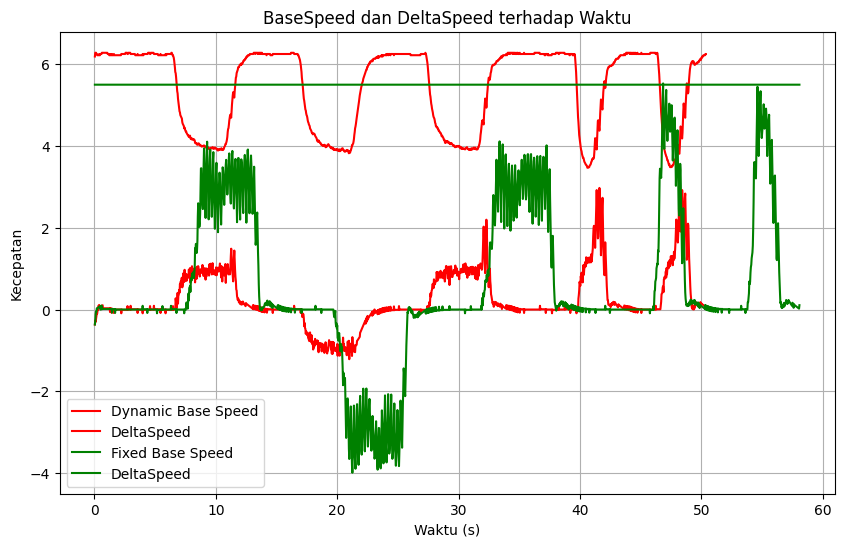

In [175]:
# Plot BaseSpeed dan DeltaSpeed terhadap waktu
plt.figure(figsize=(10, 6))
plt.plot(data1['Time'], data1['BaseSpeed'], label='Dynamic Base Speed', color='r')
plt.plot(data1['Time'], data1['DeltaSpeed'], label='DeltaSpeed', color='r')
plt.plot(data2['Time'], data2['BaseSpeed'], label='Fixed Base Speed', color='g')
plt.plot(data2['Time'], data2['DeltaSpeed'], label='DeltaSpeed', color='g')
plt.title('BaseSpeed dan DeltaSpeed terhadap Waktu')
plt.xlabel('Waktu (s)')
plt.ylabel('Kecepatan')
plt.legend()
plt.grid(True)
plt.show()

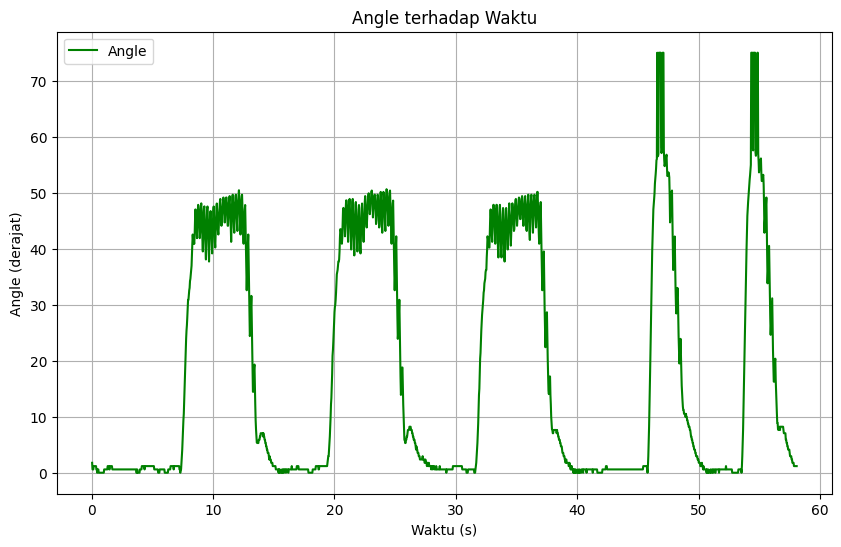

In [145]:
# Plot Angle terhadap waktu
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['Angle'], label='Angle', color='g')
plt.title('Angle terhadap Waktu')
plt.xlabel('Waktu (s)')
plt.ylabel('Angle (derajat)')
plt.legend()
plt.grid(True)
plt.show()

# Analisis Distribusi Error

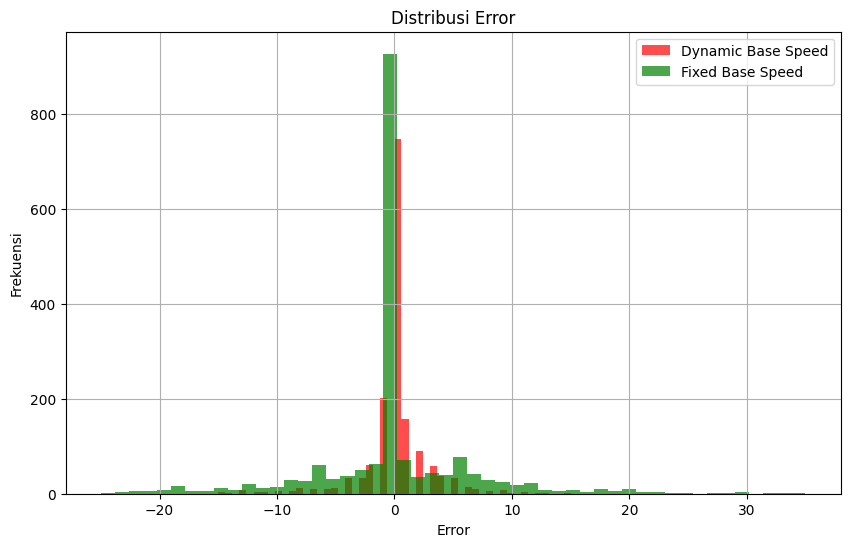

In [179]:
plt.figure(figsize=(10, 6))
plt.hist(data1['Error'], bins=50, color='r', alpha=0.7, label='Dynamic Base Speed')
plt.hist(data2['Error'], bins=50, color='g', alpha=0.7, label='Fixed Base Speed')
plt.title('Distribusi Error')
plt.xlabel('Error')
plt.ylabel('Frekuensi')
plt.legend()
plt.grid(True)
plt.show()

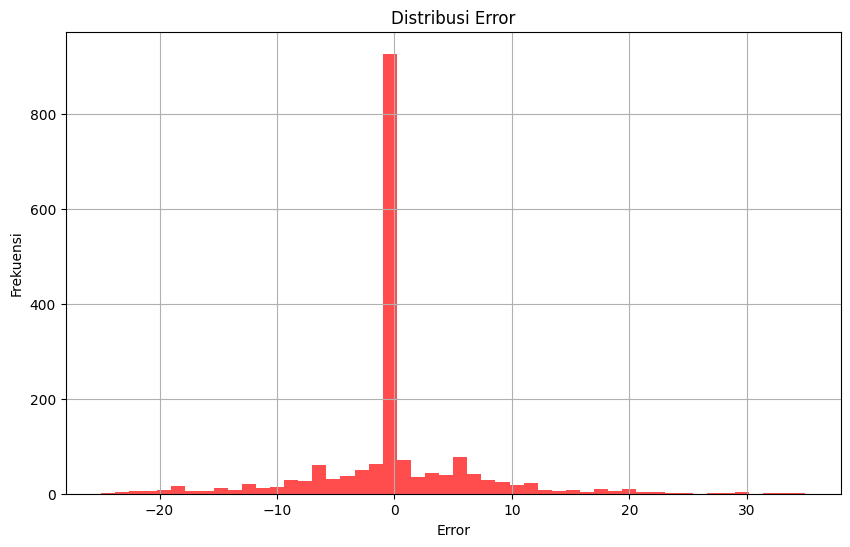

In [177]:
plt.figure(figsize=(10, 6))
plt.hist(data2['Error'], bins=50, color='r', alpha=0.7)
plt.title('Distribusi Error')
plt.xlabel('Error')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()